In [42]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
train=pd.read_csv(r'train.csv')
test=pd.read_csv(r'test.csv')

In [43]:
train.shape
test.shape
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     64

In [44]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [45]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Understand the distribution of numerical variables and generate a frequency table for numeric variables. 

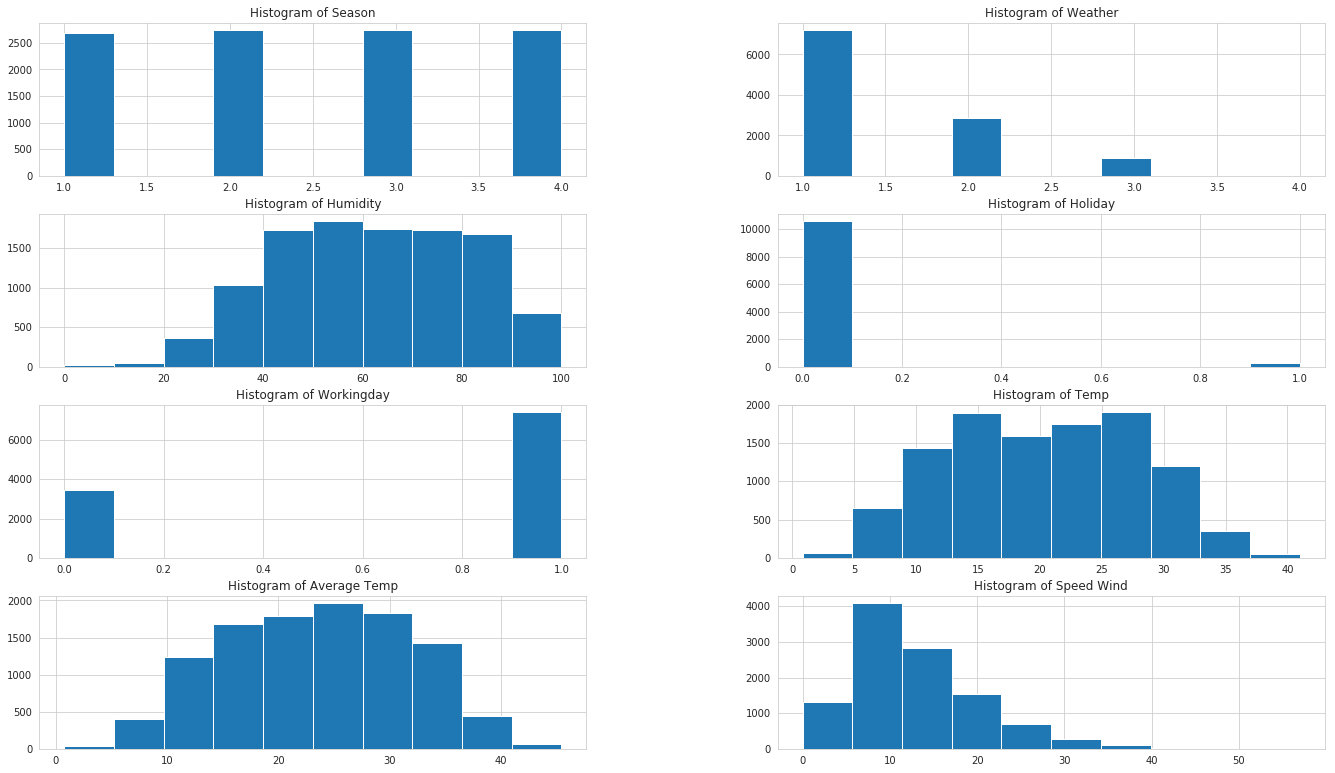

In [46]:
plt.figure(figsize=(21,12))
plt.subplot(421)
plt.hist(train.season)
plt.title('Histogram of Season')
plt.subplot(422)
plt.hist(train.weather)
plt.title('Histogram of Weather')
plt.subplot(423)
plt.hist(train.humidity)
plt.title('Histogram of Humidity')
plt.subplot(424)
plt.hist(train.holiday)
plt.title('Histogram of Holiday')
plt.subplot(425)
plt.hist(train.workingday)
plt.title('Histogram of Workingday')
plt.subplot(426)
plt.hist(train.temp)
plt.title('Histogram of Temp')
plt.subplot(427)
plt.hist(train.atemp)
plt.title('Histogram of Average Temp')
plt.subplot(428)
plt.hist(train.windspeed)
plt.title('Histogram of Speed Wind')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

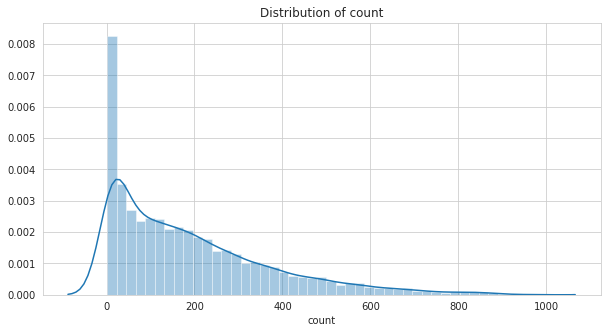

In [47]:
f,ax=plt.subplots(figsize=(10,5))
sns.distplot(train['count'])
ax.set_title('Distribution of count')
plt.savefig(r'Distribution of count',dpi=200)

In [48]:
train_WithoutOutliers=train[np.abs(train['count']-train['count'].mean())<=3*train['count'].std()]

In [49]:
train_WithoutOutliers.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000
mean,2.500978,0.028960,0.676786,1.420710,20.130507,23.548846,62.049632,12.787706,35.220039,147.783779,183.003818
std,1.119043,0.167702,0.467726,0.634956,7.777571,8.463179,19.241364,8.171075,49.546882,136.370597,166.681429
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,4.000000,35.000000,41.000000
50%,2.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,16.000000,116.000000,141.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,78.000000,16.997900,47.000000,217.000000,276.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,367.000000,712.000000,734.000000


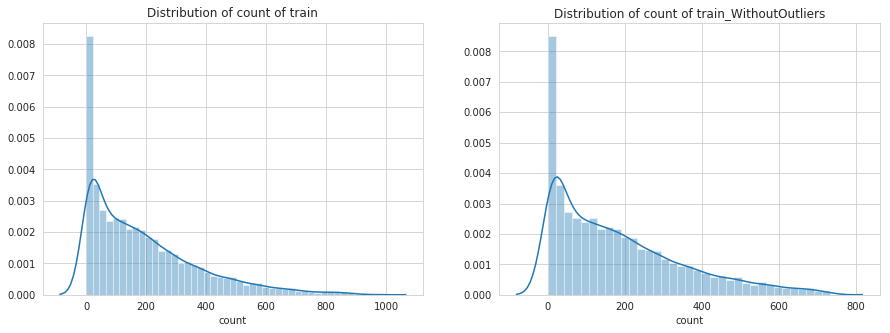

In [50]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(15,5))
sns.distplot(train['count'],ax=ax1)
sns.distplot(train_WithoutOutliers['count'],ax=ax2)
ax1.set_title('Distribution of count of train')
ax2.set_title('Distribution of count of train_WithoutOutliers')
plt.savefig(r'eDistribution of count of 2',dpi=200)

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


Text(0.5, 1.0, 'Distribution of count after log')

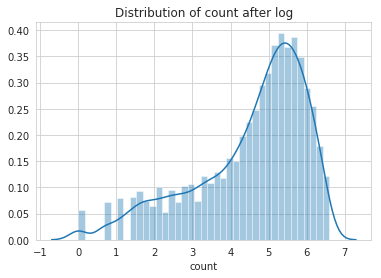

In [51]:
yLabels=np.log(train_WithoutOutliers['count'])
train_WithoutOutliers.loc[:,'count_log']=yLabels
sns.distplot(yLabels)
plt.title('Distribution of count after log')

In [52]:
df=train_WithoutOutliers.append(test,ignore_index=True)
#合并后发现列是乱的，从新排下列
df=pd.DataFrame(df,columns=train_WithoutOutliers.columns)
df.shape


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(17232, 13)

In [53]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_log
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2.772589
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,3.688879
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,3.465736
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2.564949
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,0.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17232 entries, 0 to 17231
Data columns (total 13 columns):
datetime      17232 non-null object
season        17232 non-null int64
holiday       17232 non-null int64
workingday    17232 non-null int64
weather       17232 non-null int64
temp          17232 non-null float64
atemp         17232 non-null float64
humidity      17232 non-null int64
windspeed     17232 non-null float64
casual        10739 non-null float64
registered    10739 non-null float64
count         10739 non-null float64
count_log     10739 non-null float64
dtypes: float64(7), int64(5), object(1)
memory usage: 1.7+ MB


In [55]:
df['datetime']=pd.to_datetime(df['datetime'],format='%Y-%m-%d %H:%M:%S')

In [56]:
df['yearmonth']=df['datetime'].dt.year.map(str) + '-'+ df['datetime'].dt.month.map(str)

In [57]:
df['year']=df['datetime'].dt.year
df['month']=df['datetime'].dt.month
df['weekday']=df['datetime'].dt.weekday
df['hour']=df['datetime'].dt.hour
#look at df basic information
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_log,yearmonth,year,month,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2.772589,2011-1,2011,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,3.688879,2011-1,2011,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,3.465736,2011-1,2011,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2.564949,2011-1,2011,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,0.000000,2011-1,2011,1,5,4


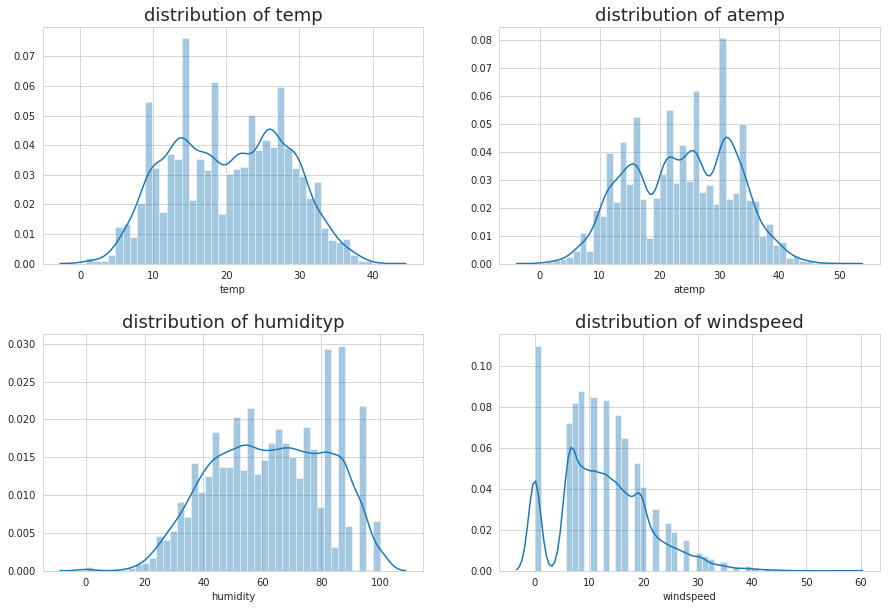

In [58]:
f,ax=plt.subplots(2,2,figsize=(15,10))
sns.distplot(df['temp'],ax=ax[0,0])
sns.distplot(df['atemp'],ax=ax[0,1])
sns.distplot(df['humidity'],ax=ax[1,0])
sns.distplot(df['windspeed'],ax=ax[1,1])
ax[0,0].set_title('distribution of temp',fontsize=18)
ax[0,1].set_title('distribution of atemp',fontsize=18)
ax[1,0].set_title('distribution of humidityp',fontsize=18)
ax[1,1].set_title('distribution of windspeed',fontsize=18)
plt.subplots_adjust(hspace=.3)

In [59]:
df.describe()['windspeed']

count    17232.000000
mean        12.728719
std          8.201072
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

In [60]:
df.describe()['temp']

count    17232.000000
mean        20.315176
std          7.888360
min          0.820000
25%         13.940000
50%         20.500000
75%         27.060000
max         41.000000
Name: temp, dtype: float64

In [61]:

from sklearn.ensemble import RandomForestRegressor
# divide windspeed into 0 and not 0
windspeed_0=df[df['windspeed']==0]
windspeed_not0=df[df['windspeed']!=0]
#choose model
rf_model=RandomForestRegressor(n_estimators=1000,random_state=42)
#choose attributes
windcolumns=['season','weather','humidity','month','temp','year','atemp']
#model training
rf_model=rf_model.fit(windspeed_not0[windcolumns],windspeed_not0['windspeed'])
#model prediction
pred=rf_model.predict(windspeed_0[windcolumns])
#put predicted windspeed into predtion
windspeed_0.loc[:,'windspeed']=pred
#connect the two data
df_rfw=windspeed_0.append(windspeed_not0)
df_rfw.reset_index(inplace=True)
df_rfw.drop('index',axis=1,inplace=True)


/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [62]:
df_rfw.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_log,yearmonth,year,month,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,6.999983,3.0,13.0,16.0,2.772589,2011-1,2011,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,6.747321,8.0,32.0,40.0,3.688879,2011-1,2011,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,6.747321,5.0,27.0,32.0,3.465736,2011-1,2011,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,6.688371,3.0,10.0,13.0,2.564949,2011-1,2011,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,6.688371,0.0,1.0,1.0,0.000000,2011-1,2011,1,5,4


Text(0.5, 1.0, 'distribution of windspeed')

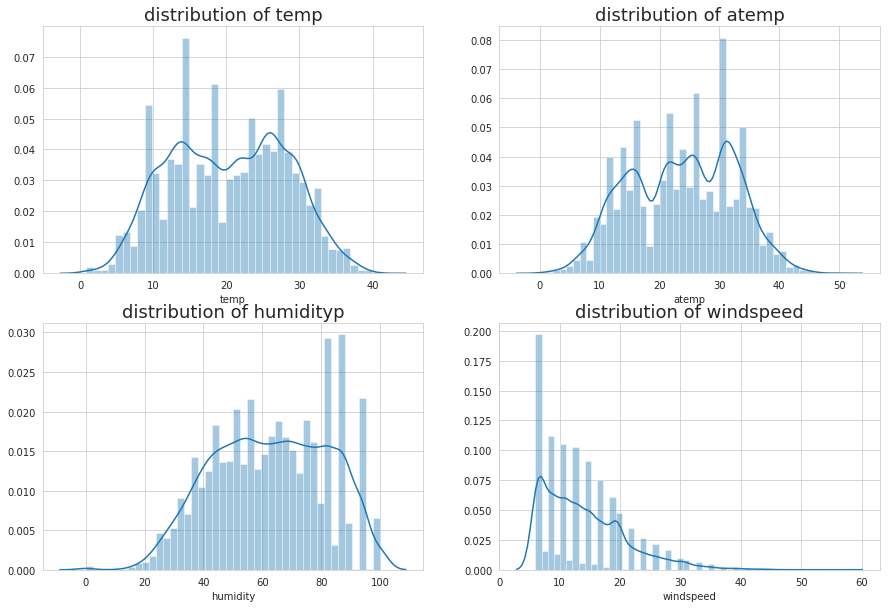

In [63]:
f,ax=plt.subplots(2,2,figsize=(15,10))
sns.distplot(df_rfw['temp'],ax=ax[0,0])
sns.distplot(df_rfw['atemp'],ax=ax[0,1])
sns.distplot(df_rfw['humidity'],ax=ax[1,0])
sns.distplot(df_rfw['windspeed'],ax=ax[1,1])
ax[0,0].set_title('distribution of temp',fontsize=18)
ax[0,1].set_title('distribution of atemp',fontsize=18)
ax[1,0].set_title('distribution of humidityp',fontsize=18)
ax[1,1].set_title('distribution of windspeed',fontsize=18)

Text(0.5, 1.0, 'Correlation Matrix')

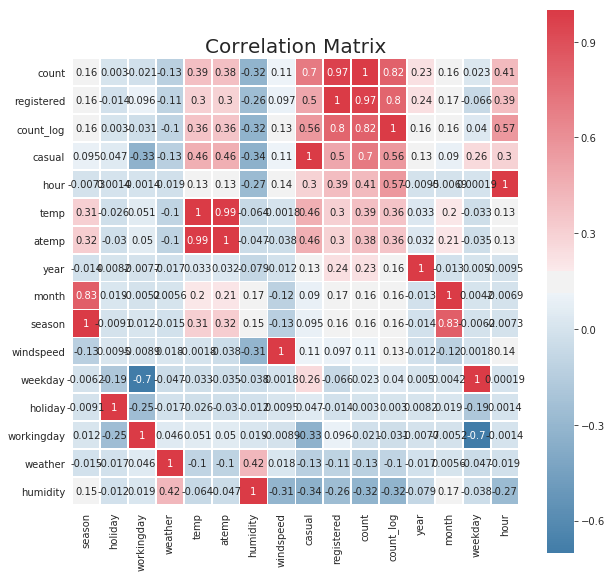

In [64]:
a=df_rfw.corr().sort_values('count',ascending=False)
f,ax=plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(a,ax=ax,square=True,lw=.8,cmap=cmap,annot=True)
ax.set_title('Correlation Matrix',fontsize=20)

In [65]:
a.sort_values('count',ascending=False)['count']

count         1.000000
registered    0.966209
count_log     0.818451
casual        0.704764
hour          0.405437
temp          0.385954
atemp         0.381967
year          0.234959
month         0.164673
season        0.159801
windspeed     0.111686
weekday       0.022602
holiday       0.002978
workingday   -0.020764
weather      -0.127519
humidity     -0.317028
Name: count, dtype: float64

### Effect of hour on count

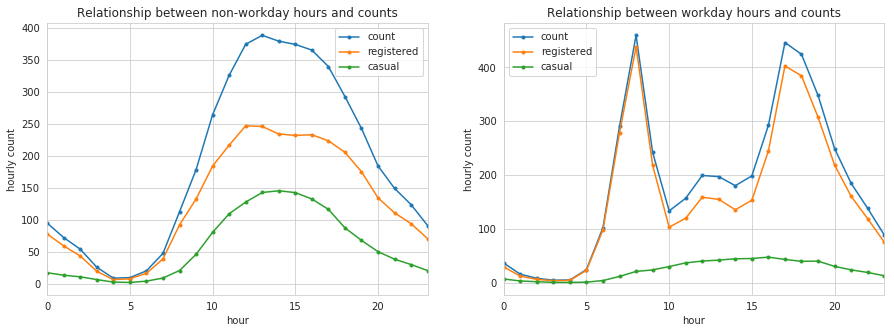

In [66]:
columns_count=['count','registered','casual']
df_rfw.head()
df_hour_work0=df_rfw.loc[df_rfw['workingday']==0,:].groupby('hour')[columns_count].mean()
df_hour_work1=df_rfw.loc[df_rfw['workingday']==1,:].groupby('hour')[columns_count].mean()
f,[ax1,ax2]=plt.subplots(1,2,figsize=(15,5))
df_hour_work0.plot(ax=ax1,style='.-')
df_hour_work1.plot(ax=ax2,style='.-')
ax1.set(title='Relationship between non-workday hours and counts',ylabel='hourly count')
ax2.set(title='Relationship between workday hours and counts',ylabel='hourly count')
plt.savefig(r'count after hour')

### Effect of temperature on count

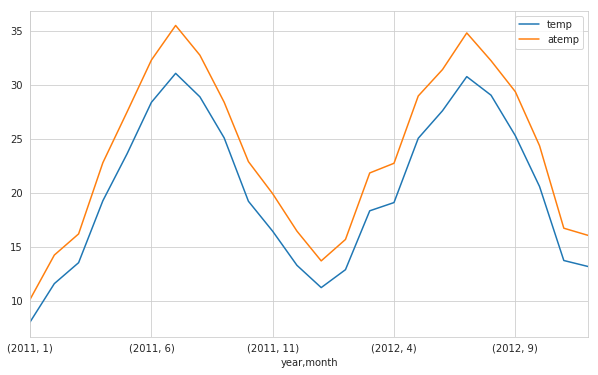

In [67]:
f,ax=plt.subplots(figsize=(10,6))
z = df_rfw.groupby(['year','month'])['temp','atemp'].mean()
z.plot(ax=ax)

Text(0.5, 1.0, 'relationship between rent counts and atemp')

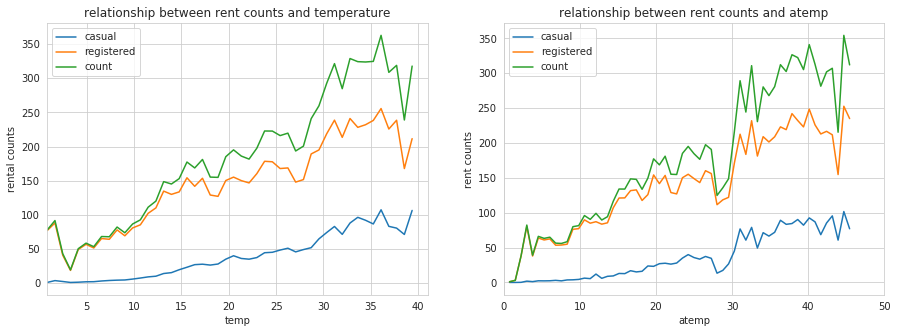

In [68]:
count_columns=['casual','registered','count']
f,[ax1,ax2]=plt.subplots(1,2,figsize=(15,5))
df_rfw.groupby('temp')[count_columns].mean().plot(ax=ax1)
df_rfw.groupby('atemp')[count_columns].mean().plot(ax=ax2)
ax1.set_ylabel('rental counts')
ax1.set_title('relationship between rent counts and temperature')
ax2.set_ylabel('rent counts')
ax2.set_title('relationship between rent counts and atemp')


### Effect of humidity on count


In [69]:
humidity_mean=df_rfw.groupby(['year','month'])['humidity'].mean()


In [70]:
df_rfw.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_log,yearmonth,year,month,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,6.999983,3.0,13.0,16.0,2.772589,2011-1,2011,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,6.747321,8.0,32.0,40.0,3.688879,2011-1,2011,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,6.747321,5.0,27.0,32.0,3.465736,2011-1,2011,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,6.688371,3.0,10.0,13.0,2.564949,2011-1,2011,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,6.688371,0.0,1.0,1.0,0.000000,2011-1,2011,1,5,4


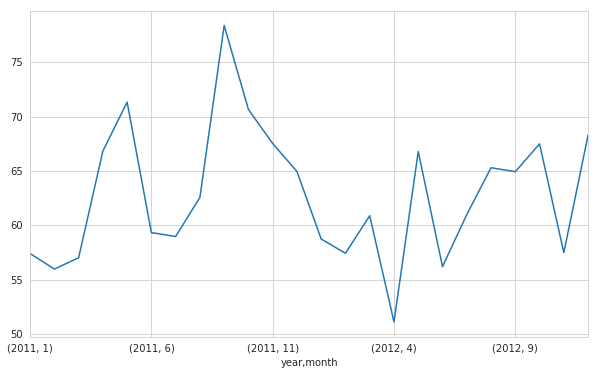

In [71]:
f, ax = plt.subplots(figsize=(10,6))
df_rfw.groupby(['year','month'])['humidity'].mean().plot(ax=ax)
labels = df_rfw.groupby(['year','month'])[['year','month']]

Text(0.5, 1.0, 'relationship between humidity and count')

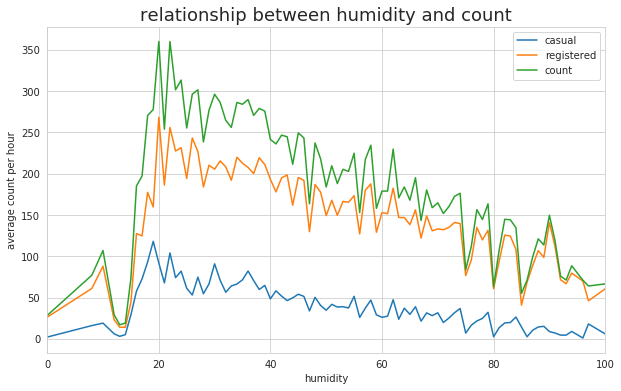

In [72]:
ax=df_rfw.groupby('humidity')[count_columns].mean().plot(figsize=(10,6))
plt.ylabel('average count per hour')
plt.title('relationship between humidity and count',fontsize=18)

### Effect of month and year on counts

In [73]:
df_rfw.groupby(['year','month'])[count_columns].mean().to_csv(r'relationship between time and count.csv')

### Effect of weather on counts

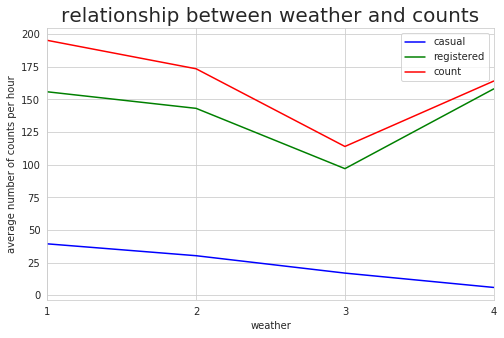

In [74]:
f, ax = plt.subplots(figsize=(8,5))
df_rfw.groupby('weather')[count_columns].mean().plot(ax=ax, color=['b','g','r'])
ax.set_xticks(range(1,5))
#ax.set_xticklabels(range(1,5),[])
ax.set_ylabel('average number of counts per hour')
ax.set_title('relationship between weather and counts',fontsize=(20))
plt.savefig(r'weather and count.png',dpi=200)

In [75]:
df_rfw[df_rfw['weather']==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_log,yearmonth,year,month,weekday,hour
7085,2012-01-09 18:00:00,1,0,1,4,8.20,11.365,86,6.0032,6.0,158.0,164.0,5.099866,2012-1,2012,1,0,18
11745,2011-01-26 16:00:00,1,0,1,4,9.02,9.850,93,22.0028,NaN,NaN,NaN,NaN,2011-1,2011,1,2,16
14438,2012-01-21 01:00:00,1,0,0,4,5.74,6.820,86,12.9980,NaN,NaN,NaN,NaN,2012-1,2012,1,5,1


### Relationship between windspeed and time

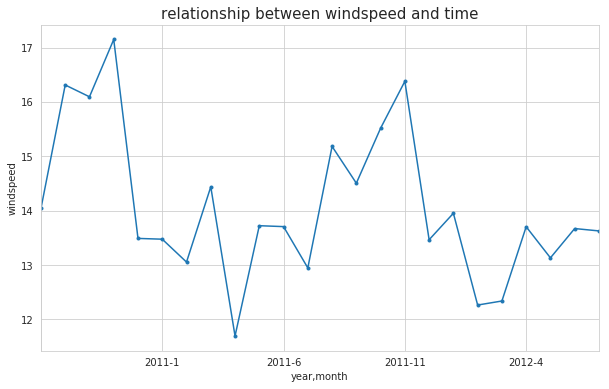

In [76]:
ax1=df_rfw.groupby(['year','month'])['windspeed'].mean().plot(figsize=(10,6),style='.-')
ax1.set_xticklabels(['','2011-1','2011-6','2011-11','2012-4','2012-9'])
ax1.set_ylabel('windspeed')
ax1.set_title('relationship between windspeed and time',fontsize=15)
plt.savefig(r'风速和时间的关系',dpi=200)

### Relationship between windspeed and counts

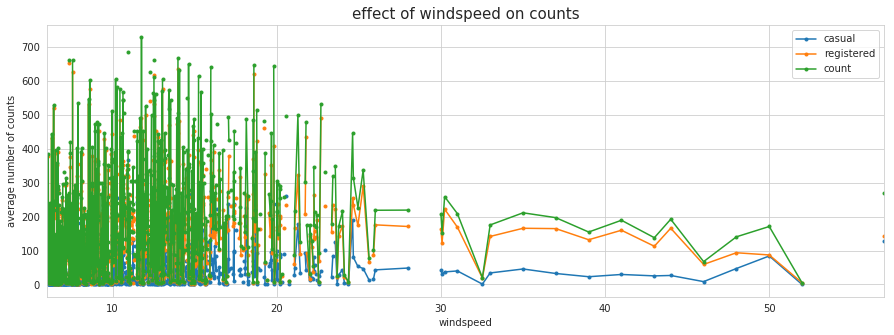

In [77]:
w=df_rfw.groupby('windspeed')[count_columns].mean()
ax=w.plot(figsize=(15,5), style = '.-')

ax.set_ylabel('average number of counts')
ax.set_title('effect of windspeed on counts',fontsize=15)
plt.savefig(r"风速对租赁数量的影响",dpi=200)

In [78]:
df_rfw[df_rfw['windspeed']>54]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_log,yearmonth,year,month,weekday,hour
4629,2011-07-03 17:00:00,3,0,0,3,32.80,37.120,49,56.9969,181.0,177.0,358.0,5.880533,2011-7,2011,7,6,17
4630,2011-07-03 18:00:00,3,0,0,3,32.80,37.120,49,56.9969,74.0,107.0,181.0,5.198497,2011-7,2011,7,6,18
11942,2011-02-25 15:00:00,1,0,1,1,18.86,22.725,41,54.0020,NaN,NaN,NaN,NaN,2011-2,2011,2,4,15
13428,2011-08-27 17:00:00,3,0,0,3,26.24,28.790,89,55.9986,NaN,NaN,NaN,NaN,2011-8,2011,8,5,17
14773,2012-02-24 21:00:00,1,0,1,1,17.22,21.210,35,54.0020,NaN,NaN,NaN,NaN,2012-2,2012,2,4,21


### Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

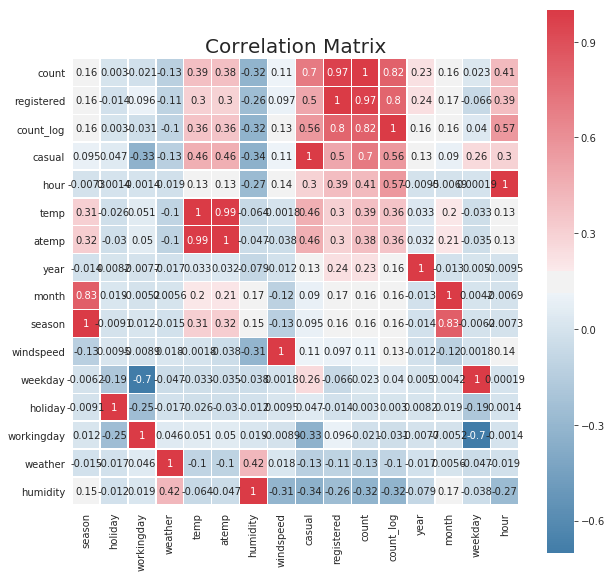

In [79]:
a=df_rfw.corr().sort_values('count',ascending=False)
f,ax=plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(a,ax=ax,square=True,lw=.3,cmap=cmap,annot=True)
ax.set_title('Correlation Matrix',fontsize=20)

In [80]:
df_rfw['temp_mean']=(df_rfw['temp']+df_rfw['atemp'])/2

season_dummy=pd.get_dummies(df_rfw['season'],prefix='season')
weather_dummy=pd.get_dummies(df_rfw['weather'],prefix='weather')
month_dummy=pd.get_dummies(df_rfw['month'],prefix='month')

feature=pd.concat([df_rfw[['temp_mean','windspeed','humidity','year','workingday','holiday','weekday','hour']],
season_dummy,weather_dummy,month_dummy],axis=1)